# Assignment 7

1. House Price Prediction System

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('house_data.csv')

# Check and encode categorical columns
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
if non_numeric_columns:
    df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Ensure 'price' column exists
if 'price' not in df.columns:
    raise KeyError("The dataset does not contain a 'price' column.")

# Define features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')


Model Evaluation:
MSE: 149210817251.74, R-squared: 0.49


2. Salary Prediction System

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('salary_data.csv')
df.dropna(inplace=True)

# Encode categorical columns
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

# Define features and target variable
if 'Salary' in df.columns:
    X = df.drop(columns=['Salary'])
    y = df['Salary']

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'MSE: {mse}, R-squared: {r2}')
else:
    print("Error: The 'Salary' column is missing from the dataset.")


MSE: 49830096.85590839, R-squared: 0.9024461774180497


3. Stock Price Trend Prediction

In [ ]:
! pip install yfinance streamlit

MSE: 276.88, R-squared: 0.84


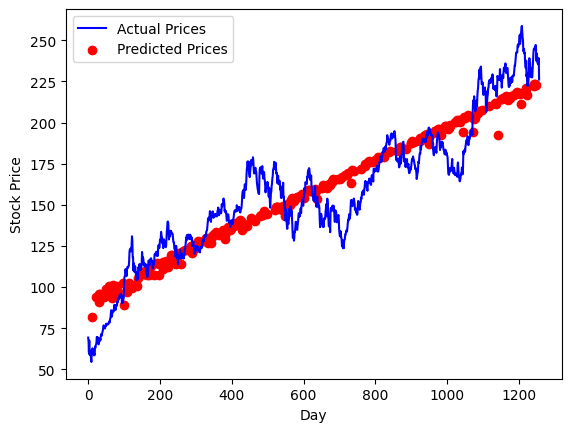

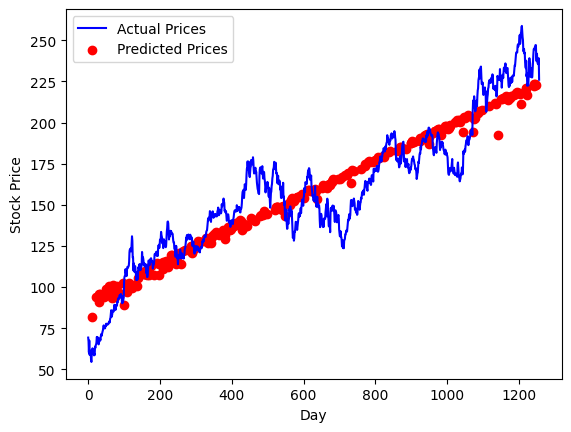

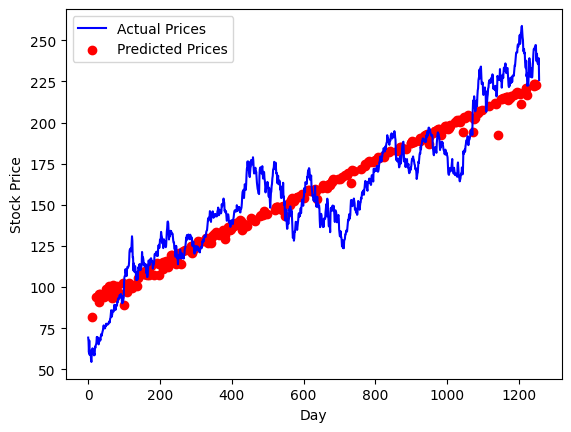

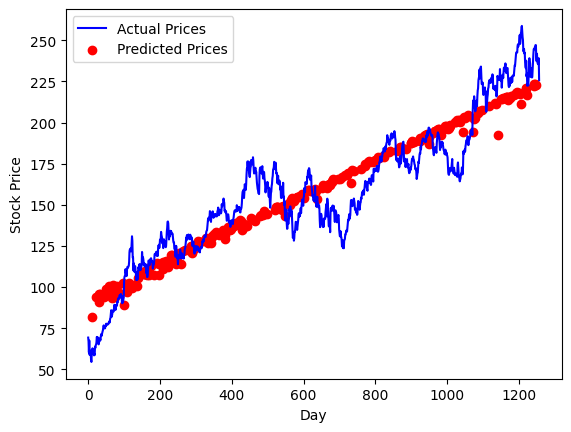

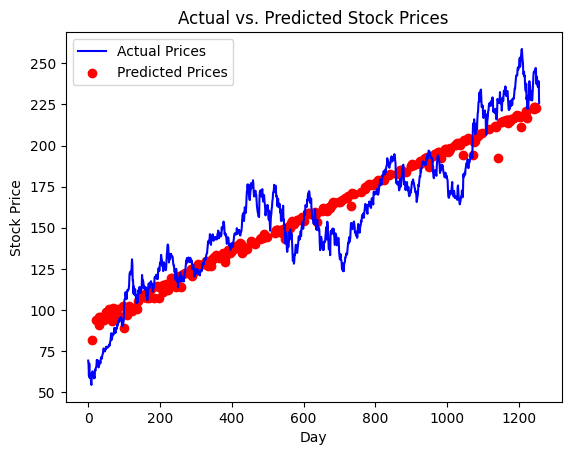

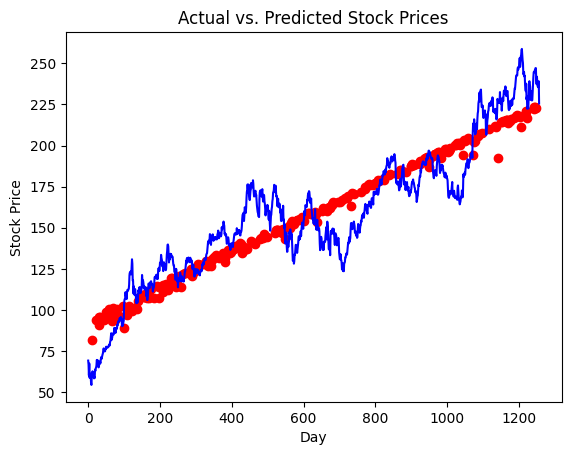

<Figure size 640x480 with 0 Axes>

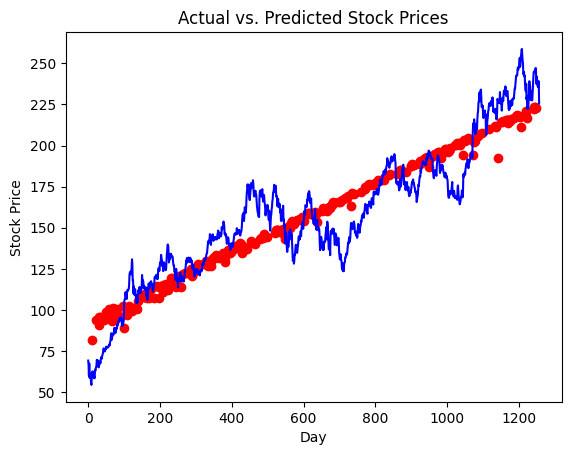

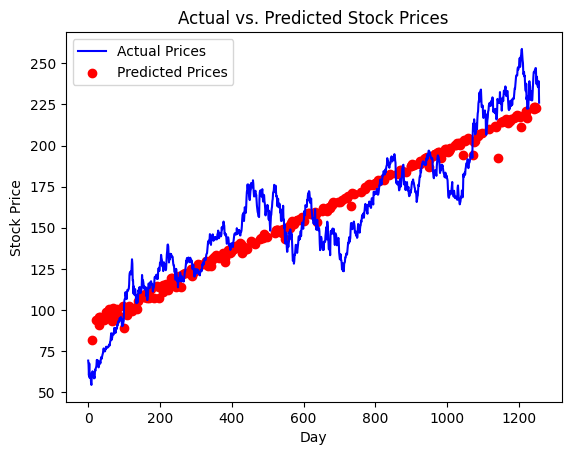

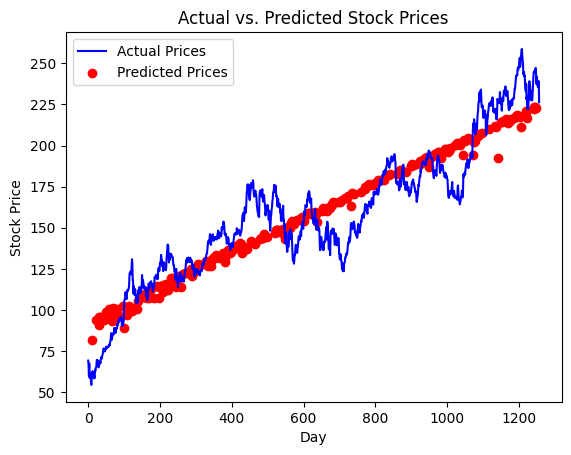

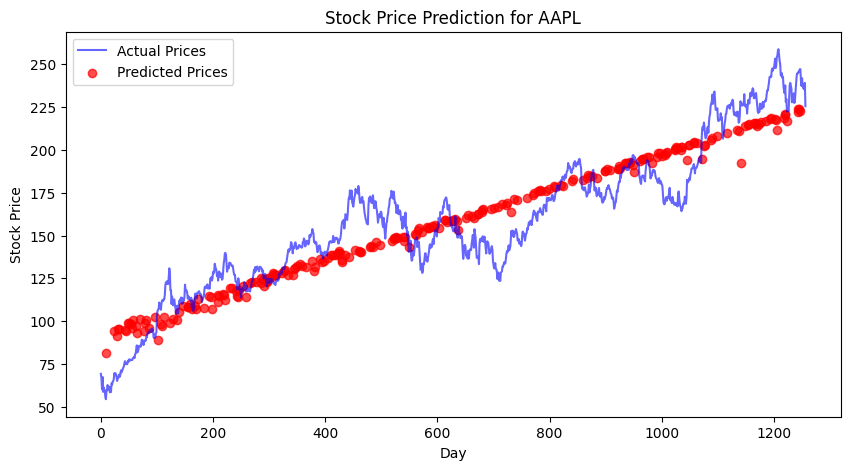

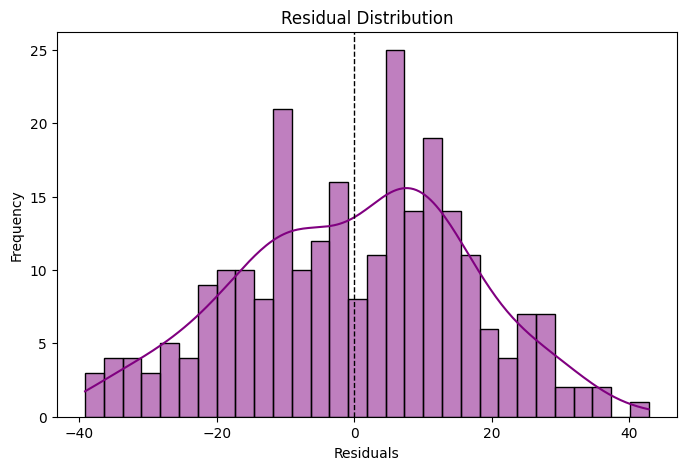

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fetch stock data
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    return df

# Set stock ticker (Manually input for Colab)
ticker = 'AAPL'  # Change this to any stock symbol
df = get_stock_data(ticker)

# Define features and target variable
X = df[['Day', 'Volume']]
y = df['Close']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}, R-squared: {r2:.2f}')

# 📊 Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(df['Day'], df['Close'], label='Actual Prices', color='blue', alpha=0.6)
plt.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red', alpha=0.7)
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Prediction for {ticker}')
plt.legend()
plt.show()

# 📈 Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()


4. Customer Churn Prediction for a Subscription Service

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('customer_churn_data.csv')

# Preprocess data
df.dropna(inplace=True)
df['churn'] = df['churn'].astype(str).str.strip().map({'False': 0, 'True': 1})

# Convert categorical columns to numerical
df = pd.get_dummies(df, columns=['international_plan', 'voice_mail_plan'], drop_first=True)

# Drop unnecessary columns
df.drop(columns=['Id', 'state', 'phone_number'], inplace=True)

# Define features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


5. Energy Consumption Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st

# Load dataset
df = pd.read_csv("owid-energy-data.csv")
df.dropna(inplace=True)

# Identify energy consumption column
energy_columns = [col for col in df.columns if "consumption" in col.lower()]
energy_column = energy_columns[0] if energy_columns else None

if not energy_column:
    raise KeyError("No energy consumption column found in the dataset.")

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop(columns=[energy_column])
y = df[energy_column]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}, R-squared: {r2:.2f}')


MSE: 2.04, R-squared: 1.00
